In [25]:
from pickling import load_pickle, create_pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import researchpy as rp
import statsmodels.api as sm
import choplo_statistique as cstats
import choplo_visualization as cvis
from statsmodels.stats.anova import AnovaRM
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import os
import statsmodels as sm
idx = pd.IndexSlice

# load data


In [26]:
amp2 = load_pickle('adulte_amp_2')
amp3 = load_pickle('adulte_amp_3')
amp4 = load_pickle('adulte_amp_4')
a_df = load_pickle('amp')


vit2 = load_pickle('adulte_vit_2')
vit3 = load_pickle('adulte_vit_3')
vit4 = load_pickle('adulte_vit_4')
v_df = load_pickle('vit')


C:\Users\tousi\AppData\Local\conda\conda\envs\python37\lib\site-packages\pandas\core\indexes\base.py:162: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)


# problem with start_cm (BIMODAL DIST)

C:\Users\tousi\AppData\Local\conda\conda\envs\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


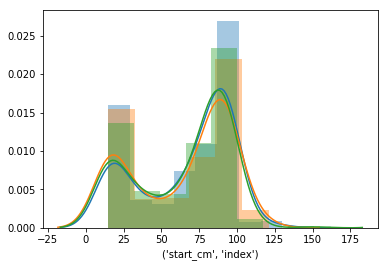

In [27]:
sns.distplot(v_df.loc[idx['lvl_0',:,:],('start_cm','index')].dropna())
sns.distplot(v_df.loc[idx['lvl_1',:,:],('start_cm','index')].dropna())
sns.distplot(v_df.loc[idx['lvl_2',:,:],('start_cm','index')].dropna())

In [ ]:
sns.distplot(a_df.loc[idx['lvl_0',:,:],('start_cm','index')].dropna())
sns.distplot(a_df.loc[idx['lvl_1',:,:],('start_cm','index')].dropna())
sns.distplot(a_df.loc[idx['lvl_2',:,:],('start_cm','index')].dropna())

# define fonction to extract data

In [42]:
def get_time_to_target_all_moves(cond, fs = 50):
    """cond is of type pyCholo.Analyse
    Ex : amp2.players[0].valid_moves[3].cof_rel.pdispl_target.index
    
    amp2.players[0].valid_moves[3].cof_rel.pdispl_target.plot() to visualize the data"""
    index_time_to_drop = []
    for p in cond.players:
        for m in p.valid_moves:
            index_time_to_drop.append(m.cof_rel.pdispl_target.index)
            
    return np.array(index_time_to_drop)/fs

# time catch drop data

In [46]:
amp2_arr = get_time_to_target_all_moves(amp2)
cond_a2 = ['amplitude'] * len(amp2_arr)
lvl_a2 = ['lvl_0'] * len(amp2_arr)

amp3_arr = get_time_to_target_all_moves(amp3)
cond_a3 = ['amplitude'] * len(amp3_arr)
lvl_a3 = ['lvl_1'] * len(amp3_arr)

amp4_arr = get_time_to_target_all_moves(amp4)
cond_a4 = ['amplitude'] * len(amp4_arr)
lvl_a4 = ['lvl_2'] * len(amp4_arr)


vit2_arr = get_time_to_target_all_moves(vit2)
cond_v2 = ['vitesse'] * len(vit2_arr)
lvl_v2 = ['lvl_0'] * len(vit2_arr)

vit3_arr = get_time_to_target_all_moves(vit3)
cond_v3 = ['vitesse'] * len(vit3_arr)
lvl_v3 = ['lvl_1'] * len(vit3_arr)

vit4_arr = get_time_to_target_all_moves(vit4)
cond_v4 = ['vitesse'] * len(vit4_arr)
lvl_v4 = ['lvl_2'] * len(vit4_arr)




In [54]:
vit4_arr.mean()
vit4_arr.std()


0.5141353896704793

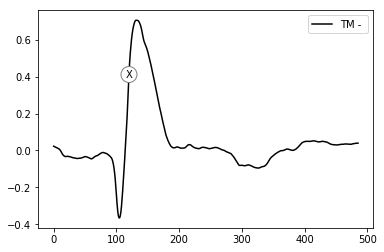

In [60]:
vit4.players[5].valid_moves[6].cof_rel.pdispl_target.plot()